<a href="https://colab.research.google.com/github/Somesh99/Machine-Learning/blob/main/pythonproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATA ANALYSIS AND VISUALIZATION OF CARS IN INDIA**

In [ ]:
import pandas as pd
data1=pd.read_csv("CARS.csv")



In [ ]:
data1.head()

,S.No,Brand,Model,Variant,Cylinders,Type,Gears,Emission_Norm,Fuel_System,Fuel_Type,Body_Type,Doors,Handbrake,Front_Brakes,Rear_Brakes,Power_Steering,Power_Windows,Odometer,Boot_Space,Power,Ground_Clearance,City_Mileage,Width,Length,Height,Fuel_Tank_Capacity,Engine_Location,Drivetrain,Displacement,Price
0,0,Tata,Nano Genx,Xt,2.0,Manual,4,BS IV,Injection,Petrol,Hatchback,5.0,Manual,Drum,Drum,Electric Power,Only Front Windows,Digital,110,5500.0,180.0,24,1750.0,3164,1652.0,24.0,Rear,RWD,624.0,"2,92,667"
1,1,Tata,Nano Genx,Xe,2.0,Manual,4,BS IV,Injection,Petrol,Hatchback,5.0,Manual,Drum,Drum,NaN,NaN,Digital,110,5500.0,180.0,24,1750.0,3164,1652.0,24.0,Rear,RWD,624.0,"2,36,447"
2,2,Tata,Nano Genx,Emax Xm,2.0,Manual,4,BS IV,Injection,CNG,Hatchback,4.0,Manual,Drum,Drum,Electric Power,NaN,Digital,110,5500.0,180.0,NaN,1750.0,3164,1652.0,15.0,Rear,RWD,624.0,"2,96,661"
3,3,Tata,Nano Genx,Xta,2.0,Automatic,5,BS IV,Injection,Petrol,Hatchback,5.0,Manual,Drum,Drum,Electric Power,Only Front Windows,Digital,94,5500.0,180.0,24,1750.0,3164,1652.0,24.0,Rear,RWD,624.0,"3,34,768"
4,4,Tata,Nano Genx,Xm,2.0,Manual,4,BS IV,Injection,Petrol,Hatchback,5.0,Manual,Drum,Drum,Electric Power,NaN,Digital,110,5500.0,180.0,24,1750.0,3164,1652.0,24.0,Rear,RWD,624.0,"2,72,223"


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   S.No                1276 non-null   int64  
 1   Brand               1276 non-null   object 
 2   Model               1276 non-null   object 
 3   Variant             1276 non-null   object 
 4   Cylinders           1210 non-null   float64
 5   Type                1275 non-null   object 
 6   Gears               1171 non-null   object 
 7   Emission_Norm       1265 non-null   object 
 8   Fuel_System         1268 non-null   object 
 9   Fuel_Type           1276 non-null   object 
 10  Body_Type           1270 non-null   object 
 11  Doors               1272 non-null   float64
 12  Handbrake           1219 non-null   object 
 13  Front_Brakes        1251 non-null   object 
 14  Rear_Brakes         1251 non-null   object 
 15  Power_Steering      1219 non-null   object 
 16  Power_

In [ ]:
data1.shape

(1276, 30)

In [ ]:
data1.isnull().sum()

S.No                    0
Brand                   0
Model                   0
Variant                 0
Cylinders              66
Type                    1
Gears                 105
Emission_Norm          11
Fuel_System             8
Fuel_Type               0
Body_Type               6
Doors                   4
Handbrake              57
Front_Brakes           25
Rear_Brakes            25
Power_Steering         57
Power_Windows          97
Odometer               43
Boot_Space            249
Power                  19
Ground_Clearance      289
City_Mileage          555
Width                  12
Length                  0
Height                  1
Fuel_Tank_Capacity     69
Engine_Location        43
Drivetrain              7
Displacement           12
Price                   0
dtype: int64

**DATA PREPROCESSING**

In [ ]:
data1.sample(8)

,S.No,Brand,Model,Variant,Cylinders,Type,Gears,Emission_Norm,Fuel_System,Fuel_Type,Body_Type,Doors,Handbrake,Front_Brakes,Rear_Brakes,Power_Steering,Power_Windows,Odometer,Boot_Space,Power,Ground_Clearance,City_Mileage,Width,Length,Height,Fuel_Tank_Capacity,Engine_Location,Drivetrain,Displacement,Price
1239,1239,Skoda,Octavia,Ambition 1.4 Tsi,4.0,Manual,6,BS IV,Injection,Petrol,Sedan,4.0,Manual,Ventilated Disc,Ventilated Disc,Electro-Hydraulic,All Windows,Digital,590,6000.0,155.0,NaN,1814.0,4670,1476.0,50.0,Front,FWD,1395.0,"15,99,599"
1127,1127,Hyundai,Creta,1.6 Crdi Sx At,4.0,Automatic,6,BS IV,Injection,Diesel,SUV,5.0,Manual,Ventilated Disc,Drum,Electric Power,All Windows,Digital,475,4000.0,190.0,17,1780.0,4270,1630.0,55.0,Front,FWD,1582.0,"15,27,395"
1037,1037,Mercedes,Mercedes-Benz C-Class,C 200 Prime,4.0,Automatic,9,BS 6,Injection,Petrol,Sedan,4.0,Automatic,Ventilated Disc,Ventilated Disc,Electric Power,All Windows,Digital,480,5800.0,157.0,NaN,1810.0,4686,1442.0,66.0,Front,RWD,1497.0,"40,90,000"
593,593,Mahindra,Xuv300,1.5 W8 Amt,NaN,Automatic,6,BS 6,Injection,Diesel,SUV,5.0,Manual,Ventilated Disc,Ventilated Disc,Yes,All Windows,Yes,259,3750.0,180.0,NaN,1821.0,3995,1617.0,42.0,Front,RWD,1497.0,"11,49,800"
192,192,Ford,Aspire,1.2 Ti-Vct Titanium,4.0,Manual,5,BS IV,Injection,Petrol,Sedan,4.0,Manual,Ventilated Disc,Drum,Electric Power,All Windows,Digital,NaN,6500.0,NaN,NaN,1704.0,3995,1525.0,42.0,Front,FWD,1194.0,"7,37,400"
842,842,Porsche,Cayenne,Base,6.0,Automatic,8,BS 6,Injection,Petrol,SUV,5.0,Automatic,Ventilated Disc,Ventilated Disc,Hydraulic Power,All Windows,Digital,770,5300.0,210.0,NaN,1983.0,4918,1705.0,75.0,Front,AWD,2995.0,"1,19,36,000"
1215,1215,Land Rover,Discovery,3.0 Hse Luxury Petrol,6.0,Automatic,8,BS IV,Injection,Petrol,SUV,5.0,Automatic,Ventilated Disc,Ventilated Disc,Electro-Hydraulic,All Windows,Digital,258,3750.0,NaN,NaN,2200.0,4988,1846.0,89.0,Front,4WD,2995.0,"89,37,846"
241,241,Volkswagen,Tiguan,Comfortline 2.0L Tdi Amt,4.0,Automatic,8,BS IV,Injection,Diesel,SUV,5.0,NaN,Ventilated Disc,Solid Disc,Electric Power,All Windows,Analog,615,4000.0,149.0,NaN,1839.0,4486,1672.0,71.0,NaN,AWD,1968.0,"28,14,500"


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import numpy as np
import plotly.express as px
l_D = len(data1)
c_m = len(data1.Brand.unique())
c_c = len(data1.Model.unique())
n_f = len(data1.columns)
fig = px.bar(x=['Cars','Brand',"Model",'Features'],y=[l_D,c_m,c_c,n_f], width=600,height=400)
fig.update_layout(
    title="Cars Statistics",
    xaxis_title="",
    yaxis_title="Counts",
    font=dict(
        size=14,
    )
)

fig.show()
plt.savefig('Overview of Datasets.png')


<Figure size 432x288 with 0 Axes>

In [ ]:
import pandas as pd
data1['Price'] = data1['Price'].replace(',', '', regex=True)
data1['Price']=data1['Price'].astype(int)
data1['Price']


0        292667
1        236447
2        296661
3        334768
4        272223
         ...   
1271    1302000
1272    1421000
1273    1431000
1274    1201000
1275    6862560
Name: Price, Length: 1276, dtype: int64

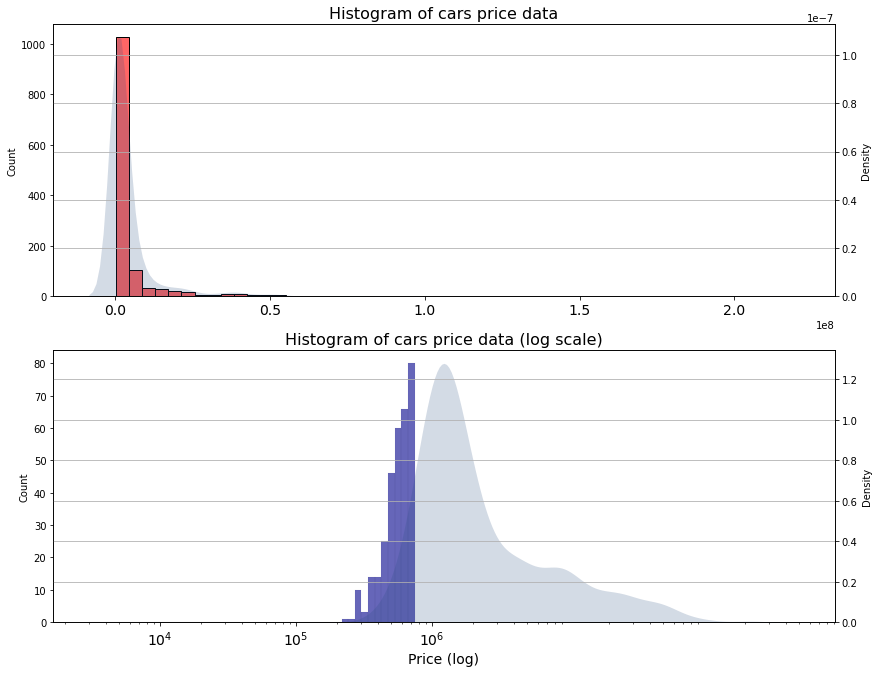

In [ ]:
import numpy as np
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(14,11))
sns.histplot(data=data1, x='Price',bins=50, alpha=0.6, color='red', ax=ax1)
ax12 = ax1.twinx()
sns.kdeplot(data=data1, x='Price', alpha=0.2,fill= True,color="#254b7f",ax=ax12,linewidth=0)
ax12.grid()
ax1.set_title('Histogram of cars price data',fontsize=16)
ax1.set_xlabel('')
logbins = np.logspace(np.log10(3000),np.log10(744944.578),50)
sns.histplot(data=data1, x='Price',bins=logbins,alpha=0.6, color='darkblue',ax=ax2)
ax2.set_title('Histogram of cars price data (log scale)',fontsize=16)
ax2.set_xscale('log')
ax22 = ax2.twinx()
ax22.grid()
sns.kdeplot(data=data1, x='Price', alpha=0.2,fill= True,color="#254b7f",ax=ax22,log_scale=True,linewidth=0)
ax2.set_xlabel('Price (log)', fontsize=14)
ax22.set_xticks((800,1000,10000,100000,1000000))
ax2.xaxis.set_tick_params(labelsize=14);
ax1.xaxis.set_tick_params(labelsize=14);
plt.savefig("Cars Price Histogram.png")



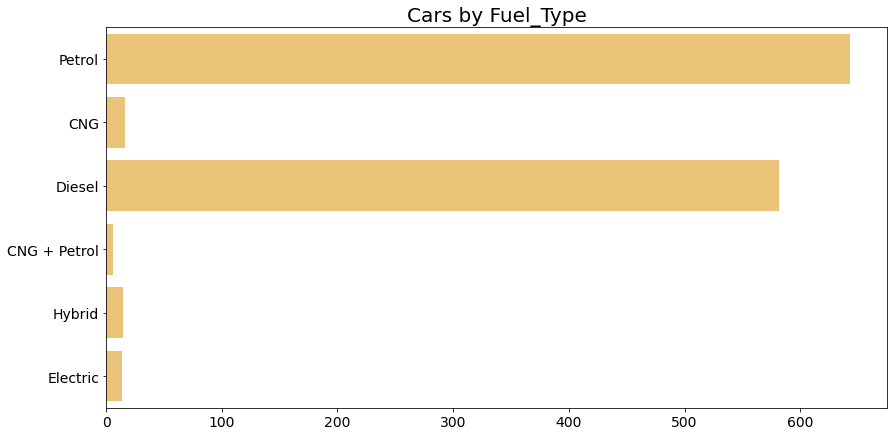

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(data=data1, y='Fuel_Type',alpha=.6,color='orange')
plt.title('Cars by Fuel_Type',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('')
plt.ylabel('');
plt.savefig("Cars by Fuel_Type.png")


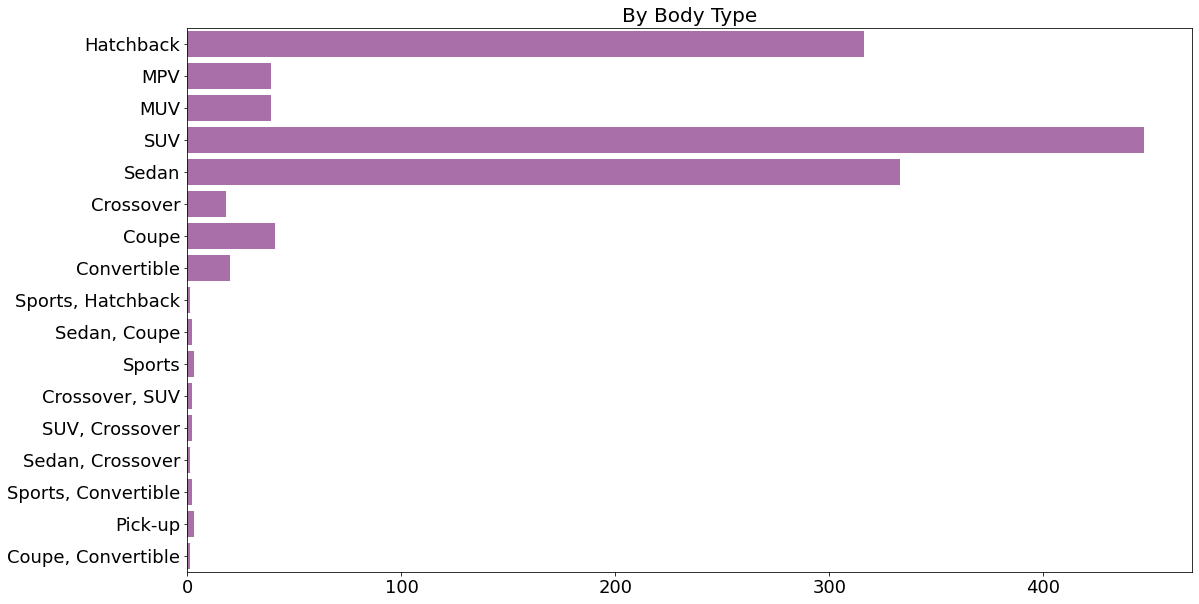

In [ ]:
plt.figure(figsize=(18,10))
sns.countplot(data=data1, y='Body_Type',alpha=.6,color='purple')
plt.title('By Body Type',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('')
plt.ylabel('')
plt.savefig("By Body Type")



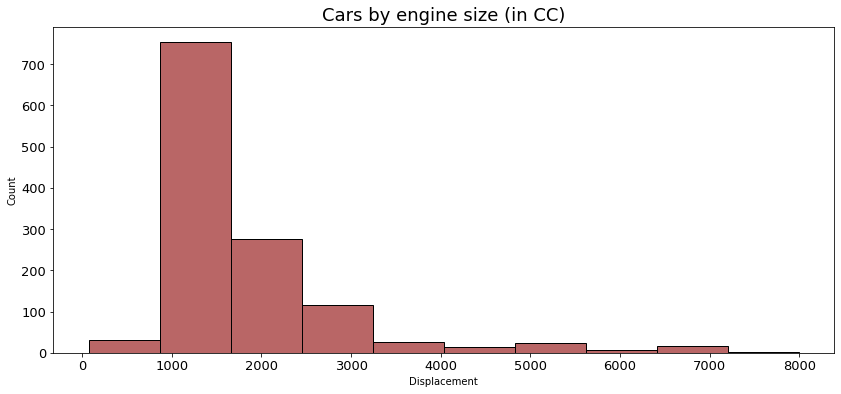

In [ ]:
plt.figure(figsize=(14,6))
sns.histplot(data=data1, x='Displacement',alpha=.6, color='darkred',bins=10)
plt.title('Cars by engine size (in CC)',fontsize=18)
plt.xticks(fontsize=13);
plt.yticks(fontsize=13);
plt.savefig("By Engine Size")

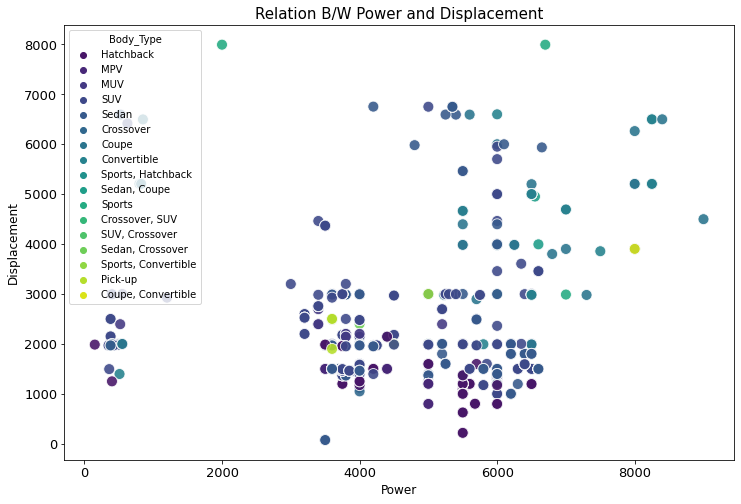

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=data1, x='Power', y='Displacement',hue='Body_Type',palette='viridis',alpha=.89, s=120 );
plt.xticks(fontsize=13);
plt.yticks(fontsize=13)
plt.xlabel('Power',fontsize=12)
plt.ylabel('Displacement',fontsize=12)
plt.title('Relation B/W Power and Displacement',fontsize=15);
plt.savefig('Power and Displacement.png')

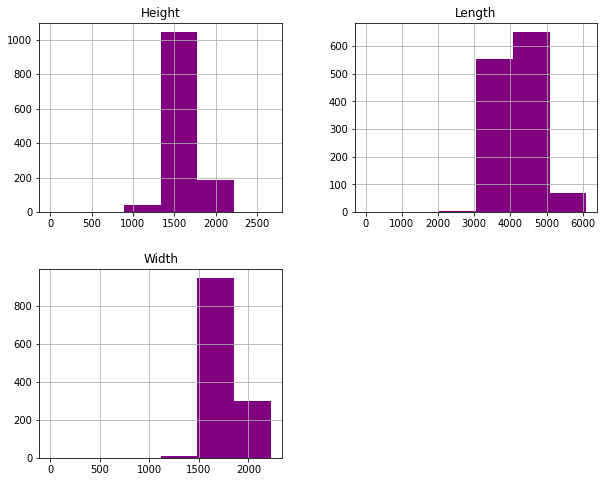

<Figure size 720x576 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
data1[['Height','Length','Width']].hist(figsize=(10,8),bins=6,color='Purple')
plt.figure(figsize=(10,8))
plt.tight_layout()
plt.show()
plt.savefig('Height || Length || Width .png')

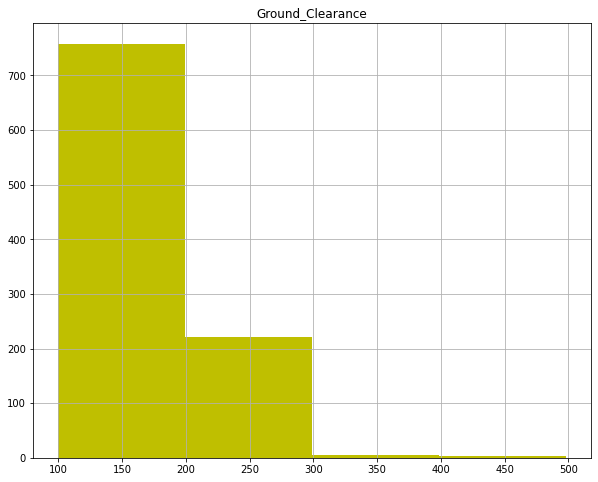

<Figure size 720x576 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:

data1[['Ground_Clearance']].hist(figsize=(10,8),bins=4,color='Y')
plt.figure(figsize=(10,8))
plt.tight_layout()

plt.show()
plt.savefig('Ground-Clearance .png')

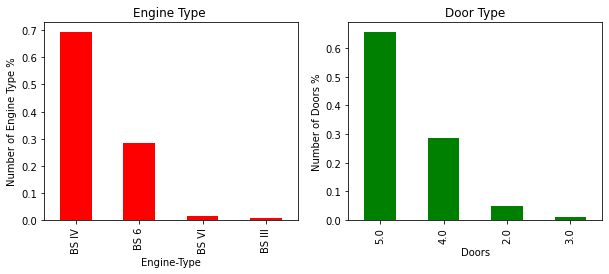

In [ ]:
plt.figure(1)
plt.subplot(221)
data1['Emission_Norm'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='red')
plt.title("Engine Type ")
plt.ylabel('Number of Engine Type %')
plt.xlabel('Engine-Type');
plt.subplot(222)
data1['Doors'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='green')
plt.title("Door Type")
plt.ylabel('Number of Doors %')
plt.xlabel('Doors');
plt.savefig('Engine And Doors.png')



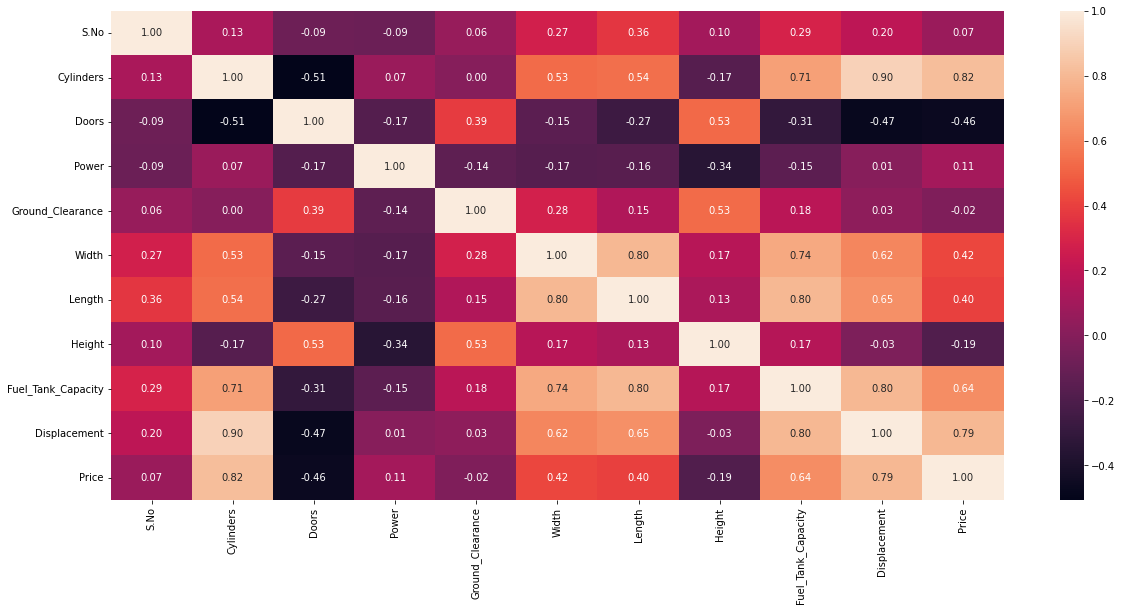

In [ ]:
import seaborn as sns
corr = data1.corr()
plt.figure(figsize=(20,9))
a = sns.heatmap(corr, annot=True, fmt='.2f')
plt.savefig('Correlation chart.png')

In [ ]:
data1.Price.max()

212155397

In [ ]:
data1.Price.min()


236447

In [ ]:
data1.Brand.value_counts()

Maruti Suzuki       149
Hyundai             130
Mahindra            119
Tata                100
Toyota               82
Honda                64
Mercedes             57
Skoda                43
Ford                 43
Bmw                  37
Renault              36
Volkswagen           34
Audi                 31
Nissan               29
Jeep                 28
Land Rover Rover     27
Datsun               24
Fiat                 23
Jaguar               22
Kia                  21
Volvo                18
Maruti Suzuki R      14
Porsche              14
Lamborghini          13
Mg                   13
Icml                 11
Lexus                10
Land Rover           10
Mini                 10
Maserati              9
RR                    9
Ferrari               8
Mitsubishi            7
Force                 6
Premier               6
Bentley               6
Isuzu                 5
Aston Martin          3
Bajaj                 2
Bugatti               2
Dc                    1
Name: Brand, dty

In [ ]:
data1[(data1['Brand'] == 'Maruti Suzuki')].value_counts()

S.No  Brand          Model     Variant        Cylinders  Type       Gears  Emission_Norm  Fuel_System  Fuel_Type  Body_Type  Doors  Handbrake  Front_Brakes     Rear_Brakes  Power_Steering  Power_Windows       Odometer  Boot_Space  Power   Ground_Clearance  City_Mileage  Width   Length  Height  Fuel_Tank_Capacity  Engine_Location  Drivetrain  Displacement  Price  
1102  Maruti Suzuki  Ciaz      1.5L Zeta      4.0        Manual     6      BS IV          Injection    Diesel     Sedan      4.0    Manual     Ventilated Disc  Drum         Electric Power  All Windows         Digital   510         4000.0  170.0             26            1730.0  4490    1485.0  43.0                Front            FWD         1498.0        1109189    1
166   Maruti Suzuki  Dzire     Zdi Plus Amt   4.0        Automatic  5      BS IV          Injection    Diesel     Sedan      4.0    Manual     Ventilated Disc  Drum         Electric Power  All Windows         Digital   378         4000.0  163.0             28    